In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/Users/sudhanvasavyasachi/Desktop/Projects/Hackathon micron/Data/sampled_data.csv")

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-13 13:35:25,01/13/2020 01:54:29 PM,1.0,2.70,1.0,N,142,170,1.0,14.0,2.5,0.5,3.45,0.0,0.3,20.75,2.5
1,2.0,2020-01-08 08:00:12,01/08/2020 08:12:32 AM,2.0,1.36,1.0,N,236,238,1.0,9.5,0.0,0.5,2.56,0.0,0.3,15.36,2.5
2,2.0,2020-01-03 15:25:34,01/03/2020 03:34:16 PM,6.0,1.28,1.0,N,142,100,2.0,7.5,0.0,0.5,0.00,0.0,0.3,10.80,2.5
3,2.0,2020-01-05 13:49:54,01/05/2020 01:58:08 PM,1.0,0.73,1.0,N,48,230,1.0,6.5,0.0,0.5,1.96,0.0,0.3,11.76,2.5
4,2.0,2020-02-09 16:16:04,02/09/2020 04:44:58 PM,1.0,4.67,1.0,N,236,238,1.0,20.0,0.0,0.5,4.66,0.0,0.3,27.96,2.5


In [6]:
df.isna().sum()

VendorID                 6527
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6527
trip_distance               0
RatecodeID               6527
store_and_fwd_flag       6527
PULocationID                0
DOLocationID                0
payment_type             6527
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               993473 non-null   float64
 1   tpep_pickup_datetime   1000000 non-null  object 
 2   tpep_dropoff_datetime  1000000 non-null  object 
 3   passenger_count        993473 non-null   float64
 4   trip_distance          1000000 non-null  float64
 5   RatecodeID             993473 non-null   float64
 6   store_and_fwd_flag     993473 non-null   object 
 7   PULocationID           1000000 non-null  int64  
 8   DOLocationID           1000000 non-null  int64  
 9   payment_type           993473 non-null   float64
 10  fare_amount            1000000 non-null  float64
 11  extra                  1000000 non-null  float64
 12  mta_tax                1000000 non-null  float64
 13  tip_amount             1000000 non-null  float64
 14  tolls_amount       

## Vendor Id

In [7]:
df['VendorID'].value_counts()

VendorID
2.0    665616
1.0    327857
Name: count, dtype: int64

## tpep_dropoff_datetime

In [9]:
df['tpep_dropoff_datetime']

0         01/13/2020 01:54:29 PM
1         01/08/2020 08:12:32 AM
2         01/03/2020 03:34:16 PM
3         01/05/2020 01:58:08 PM
4         02/09/2020 04:44:58 PM
                   ...          
999995    01/17/2020 07:28:00 PM
999996    02/23/2020 06:01:27 PM
999997    01/29/2020 09:53:51 AM
999998    02/19/2020 03:17:34 PM
999999    01/18/2020 01:22:18 PM
Name: tpep_dropoff_datetime, Length: 1000000, dtype: object

In [10]:
df['tpep_pickup_datetime']

0         2020-01-13 13:35:25
1         2020-01-08 08:00:12
2         2020-01-03 15:25:34
3         2020-01-05 13:49:54
4         2020-02-09 16:16:04
                 ...         
999995    2020-01-17 19:04:40
999996    2020-02-23 17:52:12
999997    2020-01-29 09:48:06
999998    2020-02-19 15:12:21
999999    2020-01-18 13:16:24
Name: tpep_pickup_datetime, Length: 1000000, dtype: object

### First we shall convert both of them into date time objects and then subtract them to get the duration of ride which will serve as the target variable

In [12]:
# Convert datetime columns
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Calculate duration in minutes
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

/var/folders/7w/qs77cz_11630n9gydm61vjpc0000gn/T/ipykernel_43250/2925446180.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


In [14]:
df['duration'] = df['duration'].round().astype(int)

In [15]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-13 13:35:25,2020-01-13 13:54:29,1.0,2.70,1.0,N,142,170,1.0,14.0,2.5,0.5,3.45,0.0,0.3,20.75,2.5,19
1,2.0,2020-01-08 08:00:12,2020-01-08 08:12:32,2.0,1.36,1.0,N,236,238,1.0,9.5,0.0,0.5,2.56,0.0,0.3,15.36,2.5,12
2,2.0,2020-01-03 15:25:34,2020-01-03 15:34:16,6.0,1.28,1.0,N,142,100,2.0,7.5,0.0,0.5,0.00,0.0,0.3,10.80,2.5,9
3,2.0,2020-01-05 13:49:54,2020-01-05 13:58:08,1.0,0.73,1.0,N,48,230,1.0,6.5,0.0,0.5,1.96,0.0,0.3,11.76,2.5,8
4,2.0,2020-02-09 16:16:04,2020-02-09 16:44:58,1.0,4.67,1.0,N,236,238,1.0,20.0,0.0,0.5,4.66,0.0,0.3,27.96,2.5,29


In [17]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
count,993473.000000,1000000,1000000,993473.000000,1000000.000000,993473.000000,1000000.000000,1000000.000000,993473.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,1.669989,2020-01-31 07:05:48.008673024,2020-01-31 07:21:46.805764096,1.509643,2.860084,1.057178,164.679717,162.718735,1.264671,12.626231,1.100520,0.493149,2.217285,0.337159,0.297958,18.607116,2.289019,15.978147
min,1.000000,2008-12-31 23:06:13,2008-12-31 23:37:14,0.000000,-27.270000,1.000000,1.000000,1.000000,1.000000,-315.000000,-4.500000,-0.500000,-40.000000,-21.750000,-0.300000,-315.300000,-2.500000,0.000000
25%,1.000000,2020-01-16 15:38:17.750000128,2020-01-16 15:56:57.500000,1.000000,0.960000,1.000000,132.000000,113.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,11.160000,2.500000,6.000000
50%,2.000000,2020-01-30 23:42:46.500000,2020-01-30 23:57:19,1.000000,1.600000,1.000000,162.000000,162.000000,1.000000,9.000000,0.500000,0.500000,1.960000,0.000000,0.300000,14.300000,2.500000,11.000000
75%,2.000000,2020-02-14 01:58:11.750000128,2020-02-14 02:22:34.750000128,2.000000,2.900000,1.000000,234.000000,234.000000,2.000000,14.000000,2.500000,0.500000,2.900000,0.000000,0.300000,19.800000,2.500000,17.000000
max,2.000000,2020-07-20 14:59:00,2020-07-20 15:25:00,9.000000,262.880000,99.000000,265.000000,265.000000,4.000000,600.000000,13.500000,3.300000,333.330000,86.620000,0.300000,658.350000,2.750000,5170.000000
std,0.470217,NaN,NaN,1.149797,3.761404,0.729768,65.463264,69.753017,0.471501,11.720107,1.252201,0.070126,2.703803,1.586265,0.034139,14.364545,0.716725,62.068755


### Now we shall drop drop_time as we have the duration of ride 

In [18]:
df.drop(['tpep_dropoff_datetime'],axis=1,inplace=True)

In [19]:
df

,VendorID,tpep_pickup_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-13 13:35:25,1.0,2.70,1.0,N,142,170,1.0,14.0,2.5,0.5,3.45,0.0,0.3,20.75,2.5,19
1,2.0,2020-01-08 08:00:12,2.0,1.36,1.0,N,236,238,1.0,9.5,0.0,0.5,2.56,0.0,0.3,15.36,2.5,12
2,2.0,2020-01-03 15:25:34,6.0,1.28,1.0,N,142,100,2.0,7.5,0.0,0.5,0.00,0.0,0.3,10.80,2.5,9
3,2.0,2020-01-05 13:49:54,1.0,0.73,1.0,N,48,230,1.0,6.5,0.0,0.5,1.96,0.0,0.3,11.76,2.5,8
4,2.0,2020-02-09 16:16:04,1.0,4.67,1.0,N,236,238,1.0,20.0,0.0,0.5,4.66,0.0,0.3,27.96,2.5,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2.0,2020-01-17 19:04:40,1.0,6.82,1.0,N,132,93,2.0,22.0,1.0,0.5,0.00,0.0,0.3,23.80,0.0,23
999996,1.0,2020-02-23 17:52:12,1.0,1.50,1.0,N,48,68,1.0,8.0,2.5,0.5,1.00,0.0,0.3,12.30,2.5,9
999997,1.0,2020-01-29 09:48:06,1.0,1.00,1.0,N,151,166,1.0,6.0,0.0,0.5,1.35,0.0,0.3,8.15,0.0,6
999998,1.0,2020-02-19 15:12:21,1.0,0.60,1.0,N,144,114,1.0,5.0,2.5,0.5,1.65,0.0,0.3,9.95,2.5,5


Our task is to predict duration of the ride based on 
- pickup time
- distance
- pickup location
- drop location

we need to analyse other features but there is a slight issue in some of the features. features like all the payment related ones 
- fare amount = we give the amount at the end
- Extra = also at the end
- mta_tax= it's a standard tax we need to either pay or not based on inter or intra city. but that is covered under distance so we will remove it
- tip_amount = again provided at the end
- tolls_amount = this is something which may be important considering tolls do take time but the amount will be a function of distance so we need to try figuring out how to get the number of tolls
- improvement_surcharge = again its a fixed fare which applied to 99 percent of the customer except for some but it has nothing to do with duration of ride so we will remove it
- Total amount= again it's just the sum of the previous ones
- congestion_surchage= this is quite important as it indicates high traffic zones if a tax has been imposed so we can use it as a binary variable

In [24]:
df.drop(['fare_amount','extra','mta_tax','tip_amount','improvement_surcharge','total_amount'],axis=1,inplace=True)

In [25]:
df

,VendorID,tpep_pickup_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,tolls_amount,congestion_surcharge,duration
0,1.0,2020-01-13 13:35:25,1.0,2.70,1.0,N,142,170,1.0,0.0,2.5,19
1,2.0,2020-01-08 08:00:12,2.0,1.36,1.0,N,236,238,1.0,0.0,2.5,12
2,2.0,2020-01-03 15:25:34,6.0,1.28,1.0,N,142,100,2.0,0.0,2.5,9
3,2.0,2020-01-05 13:49:54,1.0,0.73,1.0,N,48,230,1.0,0.0,2.5,8
4,2.0,2020-02-09 16:16:04,1.0,4.67,1.0,N,236,238,1.0,0.0,2.5,29
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2.0,2020-01-17 19:04:40,1.0,6.82,1.0,N,132,93,2.0,0.0,0.0,23
999996,1.0,2020-02-23 17:52:12,1.0,1.50,1.0,N,48,68,1.0,0.0,2.5,9
999997,1.0,2020-01-29 09:48:06,1.0,1.00,1.0,N,151,166,1.0,0.0,0.0,6
999998,1.0,2020-02-19 15:12:21,1.0,0.60,1.0,N,144,114,1.0,0.0,2.5,5


### Let us see if we can modify toll_amount and congestion_surcharge specific to our needs

In [ ]:
df['tolls_amount'] = abs(df['tolls_amount']) # first let us make toll values absolute values as i dont think the givt will pay me to take a ride

In [49]:
# condering most of the values are having 0 tolls which makes sense as the durations is also quite less
# hence we shall make it a binary variable
df['tolls']=df['tolls_amount']>0

In [53]:
df['tolls'].value_counts()

tolls
False    949297
True      50703
Name: count, dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   VendorID              993473 non-null   float64       
 1   tpep_pickup_datetime  1000000 non-null  datetime64[ns]
 2   passenger_count       993473 non-null   float64       
 3   trip_distance         1000000 non-null  float64       
 4   RatecodeID            993473 non-null   float64       
 5   store_and_fwd_flag    993473 non-null   object        
 6   PULocationID          1000000 non-null  int64         
 7   DOLocationID          1000000 non-null  int64         
 8   payment_type          993473 non-null   float64       
 9   tolls_amount          1000000 non-null  float64       
 10  congestion_surcharge  1000000 non-null  float64       
 11  duration              1000000 non-null  int64         
 12  tolls                 1000000 non-null  boo

In [55]:
df['congestion_surcharge'].value_counts()

congestion_surcharge
 2.50    918054
 0.00     79463
-2.50      2461
 0.75        11
 2.75        10
 0.50         1
Name: count, dtype: int64

In [60]:
df['traffic_indicator'] = pd.cut(abs(df['congestion_surcharge']), 
                                bins=[-float('inf'), 0, float('inf')],
                                labels=[0, 1])

In [61]:
df

,VendorID,tpep_pickup_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,tolls_amount,congestion_surcharge,duration,tolls,traffic_indicator
0,1.0,2020-01-13 13:35:25,1.0,2.70,1.0,N,142,170,1.0,0.0,2.5,19,False,1
1,2.0,2020-01-08 08:00:12,2.0,1.36,1.0,N,236,238,1.0,0.0,2.5,12,False,1
2,2.0,2020-01-03 15:25:34,6.0,1.28,1.0,N,142,100,2.0,0.0,2.5,9,False,1
3,2.0,2020-01-05 13:49:54,1.0,0.73,1.0,N,48,230,1.0,0.0,2.5,8,False,1
4,2.0,2020-02-09 16:16:04,1.0,4.67,1.0,N,236,238,1.0,0.0,2.5,29,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2.0,2020-01-17 19:04:40,1.0,6.82,1.0,N,132,93,2.0,0.0,0.0,23,False,0
999996,1.0,2020-02-23 17:52:12,1.0,1.50,1.0,N,48,68,1.0,0.0,2.5,9,False,1
999997,1.0,2020-01-29 09:48:06,1.0,1.00,1.0,N,151,166,1.0,0.0,0.0,6,False,0
999998,1.0,2020-02-19 15:12:21,1.0,0.60,1.0,N,144,114,1.0,0.0,2.5,5,False,1


In [62]:
df['traffic_indicator'].value_counts()

traffic_indicator
1    920537
0     79463
Name: count, dtype: int64

In [64]:
df.drop(['congestion_surcharge','tolls_amount'],axis=1,inplace=True)

In [65]:
df

,VendorID,tpep_pickup_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,duration,tolls,traffic_indicator
0,1.0,2020-01-13 13:35:25,1.0,2.70,1.0,N,142,170,1.0,19,False,1
1,2.0,2020-01-08 08:00:12,2.0,1.36,1.0,N,236,238,1.0,12,False,1
2,2.0,2020-01-03 15:25:34,6.0,1.28,1.0,N,142,100,2.0,9,False,1
3,2.0,2020-01-05 13:49:54,1.0,0.73,1.0,N,48,230,1.0,8,False,1
4,2.0,2020-02-09 16:16:04,1.0,4.67,1.0,N,236,238,1.0,29,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2.0,2020-01-17 19:04:40,1.0,6.82,1.0,N,132,93,2.0,23,False,0
999996,1.0,2020-02-23 17:52:12,1.0,1.50,1.0,N,48,68,1.0,9,False,1
999997,1.0,2020-01-29 09:48:06,1.0,1.00,1.0,N,151,166,1.0,6,False,0
999998,1.0,2020-02-19 15:12:21,1.0,0.60,1.0,N,144,114,1.0,5,False,1


## Pickup date and time

In [67]:
df['tpep_pickup_datetime']

0        2020-01-13 13:35:25
1        2020-01-08 08:00:12
2        2020-01-03 15:25:34
3        2020-01-05 13:49:54
4        2020-02-09 16:16:04
                 ...        
999995   2020-01-17 19:04:40
999996   2020-02-23 17:52:12
999997   2020-01-29 09:48:06
999998   2020-02-19 15:12:21
999999   2020-01-18 13:16:24
Name: tpep_pickup_datetime, Length: 1000000, dtype: datetime64[ns]

In [68]:
# Extract hour (0-23) and day of week (0-6, where 0 is Monday)
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek

In [69]:
df

,VendorID,tpep_pickup_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,duration,tolls,traffic_indicator,pickup_hour,pickup_day
0,1.0,2020-01-13 13:35:25,1.0,2.70,1.0,N,142,170,1.0,19,False,1,13,0
1,2.0,2020-01-08 08:00:12,2.0,1.36,1.0,N,236,238,1.0,12,False,1,8,2
2,2.0,2020-01-03 15:25:34,6.0,1.28,1.0,N,142,100,2.0,9,False,1,15,4
3,2.0,2020-01-05 13:49:54,1.0,0.73,1.0,N,48,230,1.0,8,False,1,13,6
4,2.0,2020-02-09 16:16:04,1.0,4.67,1.0,N,236,238,1.0,29,False,1,16,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2.0,2020-01-17 19:04:40,1.0,6.82,1.0,N,132,93,2.0,23,False,0,19,4
999996,1.0,2020-02-23 17:52:12,1.0,1.50,1.0,N,48,68,1.0,9,False,1,17,6
999997,1.0,2020-01-29 09:48:06,1.0,1.00,1.0,N,151,166,1.0,6,False,0,9,2
999998,1.0,2020-02-19 15:12:21,1.0,0.60,1.0,N,144,114,1.0,5,False,1,15,2


In [70]:
import holidays
us_holidays = holidays.US()
df['is_holiday'] = df['tpep_pickup_datetime'].dt.date.apply(lambda x: x in us_holidays).astype(int)

In [72]:
df['is_holiday'].value_counts()

is_holiday
0    960475
1     39525
Name: count, dtype: int64

In [73]:
df.drop(['tpep_pickup_datetime'],axis=1,inplace=True)

In [74]:
df

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,duration,tolls,traffic_indicator,pickup_hour,pickup_day,is_holiday
0,1.0,1.0,2.70,1.0,N,142,170,1.0,19,False,1,13,0,0
1,2.0,2.0,1.36,1.0,N,236,238,1.0,12,False,1,8,2,0
2,2.0,6.0,1.28,1.0,N,142,100,2.0,9,False,1,15,4,0
3,2.0,1.0,0.73,1.0,N,48,230,1.0,8,False,1,13,6,0
4,2.0,1.0,4.67,1.0,N,236,238,1.0,29,False,1,16,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2.0,1.0,6.82,1.0,N,132,93,2.0,23,False,0,19,4,0
999996,1.0,1.0,1.50,1.0,N,48,68,1.0,9,False,1,17,6,0
999997,1.0,1.0,1.00,1.0,N,151,166,1.0,6,False,0,9,2,0
999998,1.0,1.0,0.60,1.0,N,144,114,1.0,5,False,1,15,2,0


## Passenger_count

In [77]:
df['passenger_count'].isna().sum()

6527

## vendor id

In [81]:
df['VendorID'].value_counts()

VendorID
2.0    665616
1.0    327857
Name: count, dtype: int64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   VendorID            993473 non-null   float64 
 1   passenger_count     993473 non-null   float64 
 2   trip_distance       1000000 non-null  float64 
 3   RatecodeID          993473 non-null   float64 
 4   store_and_fwd_flag  993473 non-null   object  
 5   PULocationID        1000000 non-null  int64   
 6   DOLocationID        1000000 non-null  int64   
 7   payment_type        993473 non-null   float64 
 8   duration            1000000 non-null  int64   
 9   tolls               1000000 non-null  bool    
 10  traffic_indicator   1000000 non-null  category
 11  pickup_hour         1000000 non-null  int32   
 12  pickup_day          1000000 non-null  int32   
 13  is_holiday          1000000 non-null  int64   
dtypes: bool(1), category(1), float64(5), int32(2), int6

<Axes: >

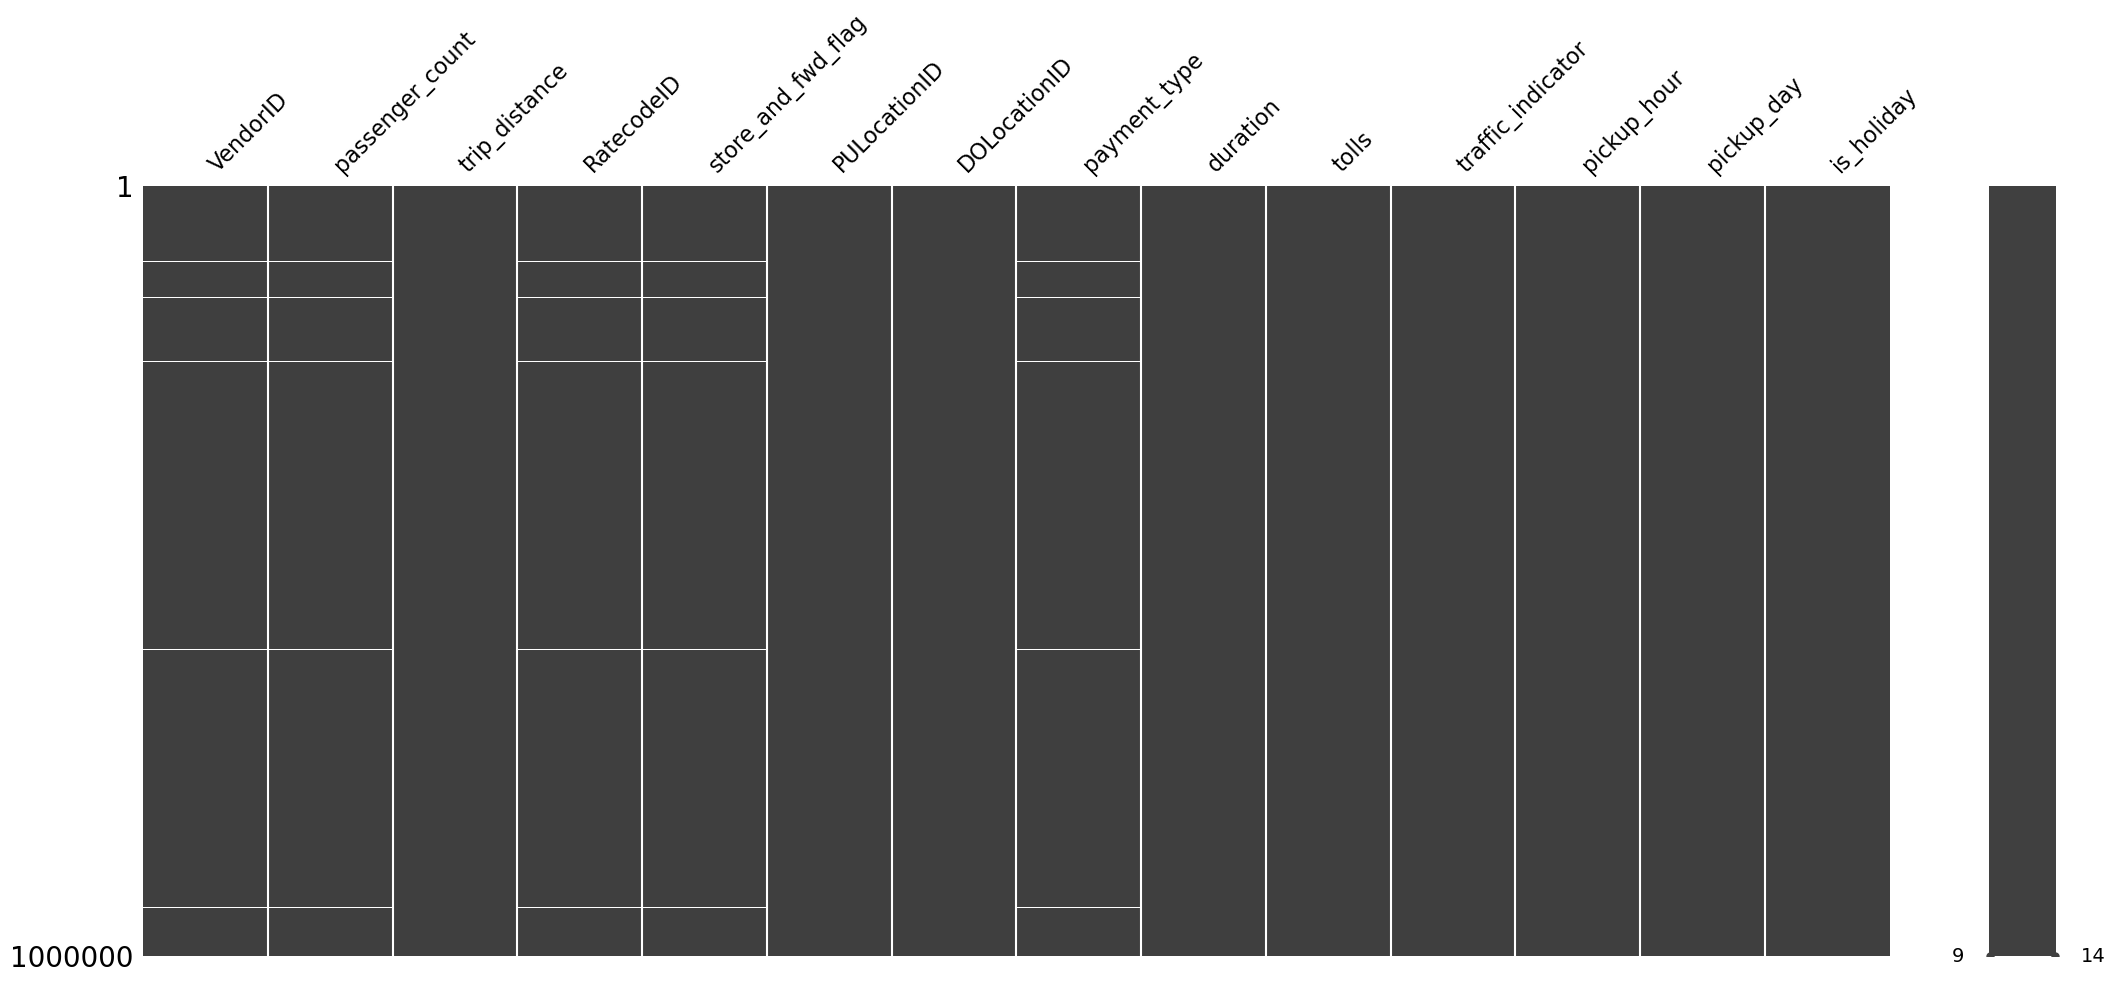

In [90]:
import missingno as msno
msno.matrix(df)

In [92]:
df[df.isnull().any(axis=1)]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,duration,tolls,traffic_indicator,pickup_hour,pickup_day,is_holiday
270,NaN,NaN,6.99,NaN,NaN,79,61,NaN,36,False,0,14,3,0
356,NaN,NaN,10.56,NaN,NaN,236,18,NaN,26,False,0,20,4,0
411,NaN,NaN,8.60,NaN,NaN,42,254,NaN,23,False,0,19,5,0
431,NaN,NaN,4.00,NaN,NaN,17,231,NaN,12,False,0,3,3,0
720,NaN,NaN,14.79,NaN,NaN,164,89,NaN,49,True,0,14,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999277,NaN,NaN,5.31,NaN,NaN,65,100,NaN,25,False,0,13,3,0
999351,NaN,NaN,1.93,NaN,NaN,183,208,NaN,9,False,0,10,0,1
999488,NaN,NaN,9.90,NaN,NaN,89,50,NaN,20,True,0,1,0,0
999523,NaN,NaN,10.11,NaN,NaN,87,42,NaN,46,False,0,15,4,0


### we observe that null values are completely uniform so those 6527 values which were null in one column are also null in other column.

In [94]:
df.dropna(inplace=True)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 993473 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   VendorID            993473 non-null  float64 
 1   passenger_count     993473 non-null  float64 
 2   trip_distance       993473 non-null  float64 
 3   RatecodeID          993473 non-null  float64 
 4   store_and_fwd_flag  993473 non-null  object  
 5   PULocationID        993473 non-null  int64   
 6   DOLocationID        993473 non-null  int64   
 7   payment_type        993473 non-null  float64 
 8   duration            993473 non-null  int64   
 9   tolls               993473 non-null  bool    
 10  traffic_indicator   993473 non-null  category
 11  pickup_hour         993473 non-null  int32   
 12  pickup_day          993473 non-null  int32   
 13  is_holiday          993473 non-null  int64   
dtypes: bool(1), category(1), float64(5), int32(2), int64(4), object(1)
memory

## Passenger_count

In [99]:
df['passenger_count'].value_counts()

passenger_count
1.0    714292
2.0    147115
3.0     38532
5.0     35283
6.0     20722
0.0     18806
4.0     18713
7.0         8
9.0         1
8.0         1
Name: count, dtype: int64

In [100]:
# we shall remove the passenger counts whose value is less than equal to 0 and greater than 6
df.drop(df[(df['passenger_count'] <= 0) | (df['passenger_count'] > 6)].index, inplace=True)
df['passenger_count'].value_counts()

passenger_count
1.0    714292
2.0    147115
3.0     38532
5.0     35283
6.0     20722
4.0     18713
Name: count, dtype: int64

In [102]:
df.shape

(974657, 14)

## Trip distance

In [108]:
df[df['trip_distance']>90]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,duration,tolls,traffic_indicator,pickup_hour,pickup_day,is_holiday
149623,2.0,1.0,122.62,5.0,N,132,265,1.0,138,False,0,16,5,0
161950,2.0,4.0,96.26,5.0,N,132,265,1.0,108,True,0,7,4,0
384915,2.0,1.0,207.11,1.0,N,208,265,2.0,215,False,0,13,5,0
437394,2.0,4.0,262.88,5.0,N,132,265,1.0,271,True,1,9,6,0
624992,2.0,1.0,91.41,1.0,N,163,7,2.0,332,False,1,17,3,0
948971,2.0,1.0,91.66,5.0,N,113,265,1.0,106,True,1,0,6,0


In [109]:
df=df[df['trip_distance']<90]

In [110]:
df.shape

(974651, 14)

## Duration

In [112]:
df['duration'].describe()

count    974651.000000
mean         15.970288
std          62.817309
min           0.000000
25%           6.000000
50%          11.000000
75%          17.000000
max        5170.000000
Name: duration, dtype: float64

In [114]:
df[df['duration']> 100]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,duration,tolls,traffic_indicator,pickup_hour,pickup_day,is_holiday
86,2.0,2.0,2.24,1.0,N,230,90,1.0,1439,False,1,23,4,0
145,2.0,1.0,0.72,1.0,N,230,186,1.0,1392,False,1,12,1,0
397,2.0,1.0,0.77,1.0,N,107,113,1.0,1437,False,1,21,2,0
1737,2.0,5.0,3.15,1.0,N,186,140,2.0,1427,False,1,14,0,1
1835,2.0,1.0,2.00,1.0,N,170,141,1.0,1392,False,1,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998377,2.0,6.0,3.96,1.0,N,246,261,1.0,1405,False,1,0,2,1
998409,2.0,1.0,1.06,1.0,N,237,162,1.0,1432,False,1,7,3,0
998692,2.0,1.0,4.88,1.0,N,186,166,2.0,1403,False,1,0,4,0
999338,2.0,5.0,1.85,1.0,N,158,68,1.0,1435,False,1,7,2,0


In [115]:
## use duration values less than 100
df.drop(df[(df['duration'] > 100)].index, inplace=True)
df.shape

/var/folders/7w/qs77cz_11630n9gydm61vjpc0000gn/T/ipykernel_43250/1238577700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[(df['duration'] > 100)].index, inplace=True)


(972435, 14)

In [116]:
df['duration'].describe()

count    972435.000000
mean         13.166051
std           9.977748
min           0.000000
25%           6.000000
50%          11.000000
75%          17.000000
max         100.000000
Name: duration, dtype: float64

## Train Test split

In [117]:
from sklearn.model_selection import train_test_split

# First split: 80% train, 20% rest
train_df, temp_df = train_test_split(df, test_size=0.1, random_state=42)

# Second split: split the remaining 20% into two equal parts (10% each)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Print the shapes to verify the split ratios
print(f"Training set shape: {train_df.shape}")
print(f"Validation set shape: {val_df.shape}")
print(f"Test set shape: {test_df.shape}")

Training set shape: (875191, 14)
Validation set shape: (48622, 14)
Test set shape: (48622, 14)


In [118]:
# Save the datasets
train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)
val_df.to_csv('val_data.csv', index=False)